In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import pydotplus
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

In [ ]:
pd.set_option('display.max_rows', None)  # 전체 행 출력
#pd.options.display.max_rows = 60

## 1. 전처리 및 train set, test set 생성

In [ ]:
# train set으로 쓰일 시,도별 + 경기도 데이터 셋

sido = pd.read_csv("/content/drive/Shareddrives/IPS/최종 데이터/지역명_사망자수(train).csv")
sido = sido.drop(columns=['Unnamed: 0'])
sido

,지역명,병원수,격리병상수,남은 격리병상수,총인구,요양기관수,60세 이상 - 계,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,확진자수,사망자수
0,강원도,18.0,539.0,75.0,1347375.0,34.0,369970,116558,81374,56864,53119,38211,23844,440985.0,746
1,경상남도,35.0,940.0,176.0,3295942.0,129.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,1134
2,경상북도,29.0,1046.0,271.0,2583157.0,111.0,719154,213011,162533,119640,100383,75400,48187,731978.0,1203
3,광주광역시,19.0,240.0,55.0,1477573.0,60.0,290547,96662,65287,52134,38610,23826,14028,518968.0,520
4,대구광역시,18.0,876.0,249.0,2410700.0,75.0,559877,182705,133421,95965,73211,47435,27140,734292.0,1243
5,대전광역시,10.0,325.0,80.0,1488435.0,47.0,299964,102881,70114,50097,37683,24168,15021,496421.0,612
6,부산광역시,28.0,679.0,188.0,3212282.0,169.0,869020,278378,214341,157522,114719,68256,35804,1026370.0,2002
7,서울특별시,47.0,2150.0,361.0,9231569.0,125.0,2045748,654912,485063,369940,272798,163781,99254,3391551.0,4504
8,세종특별자치시,2.0,32.0,9.0,353933.0,5.0,48720,16969,11421,7769,5719,3938,2904,134571.0,34
9,울산광역시,7.0,229.0,49.0,1135423.0,40.0,218134,84906,55024,34583,22620,13350,7651,366309.0,322


In [ ]:
sido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         46 non-null     object 
 1   병원수         46 non-null     float64
 2   격리병상수       46 non-null     float64
 3   남은 격리병상수    46 non-null     float64
 4   총인구         46 non-null     float64
 5   요양기관수       46 non-null     float64
 6   60세 이상 - 계  46 non-null     int64  
 7   60~64세      46 non-null     int64  
 8   65~69세      46 non-null     int64  
 9   70~74세      46 non-null     int64  
 10  75~79세      46 non-null     int64  
 11  80~84세      46 non-null     int64  
 12  85세이상       46 non-null     int64  
 13  확진자수        46 non-null     float64
 14  사망자수        46 non-null     int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 5.5+ KB


In [ ]:
# 칼럼명 변경

columns = ['loc','cnt_hos','bed','remain_bed','pop','nurse','total60','60-64','65-69','70-74','75-79','80-84','85-','conf','death']
var_name = pd.DataFrame(sido.columns, columns, columns=['meaning'])
var_name

,meaning
loc,지역명
cnt_hos,병원수
bed,격리병상수
remain_bed,남은 격리병상수
pop,총인구
nurse,요양기관수
total60,60세 이상 - 계
60-64,60~64세
65-69,65~69세
70-74,70~74세


In [ ]:
sido.columns = columns
sido.head()

,loc,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,death
0,강원도,18.0,539.0,75.0,1347375.0,34.0,369970,116558,81374,56864,53119,38211,23844,440985.0,746
1,경상남도,35.0,940.0,176.0,3295942.0,129.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,1134
2,경상북도,29.0,1046.0,271.0,2583157.0,111.0,719154,213011,162533,119640,100383,75400,48187,731978.0,1203
3,광주광역시,19.0,240.0,55.0,1477573.0,60.0,290547,96662,65287,52134,38610,23826,14028,518968.0,520
4,대구광역시,18.0,876.0,249.0,2410700.0,75.0,559877,182705,133421,95965,73211,47435,27140,734292.0,1243


### 1-1. outlier 제거 -> 안 하고 정규화로 대체

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  """


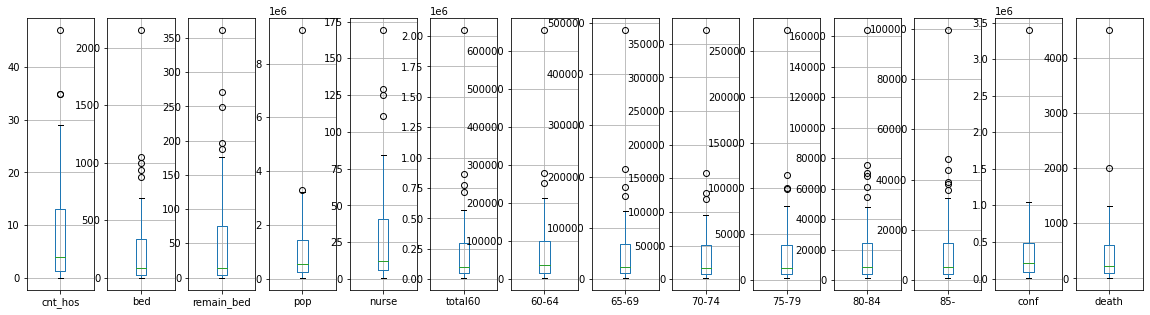

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=14)
for (i,j) in zip(sido.drop(columns=['loc']).columns, range(0,14)):
    sido.boxplot(column=i, ax = axes[j])

plt.tight_layout()
fig.set_size_inches(20, 5)
plt.show()

In [ ]:
sido = sido.drop(index=[7]) # 서울 제거 
sido = sido.reset_index(drop=True)
sido.head()

,loc,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,death
0,강원도,18.0,539.0,75.0,1347375.0,34.0,369970,116558,81374,56864,53119,38211,23844,440985.0,746
1,경상남도,35.0,940.0,176.0,3295942.0,129.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,1134
2,경상북도,29.0,1046.0,271.0,2583157.0,111.0,719154,213011,162533,119640,100383,75400,48187,731978.0,1203
3,광주광역시,19.0,240.0,55.0,1477573.0,60.0,290547,96662,65287,52134,38610,23826,14028,518968.0,520
4,대구광역시,18.0,876.0,249.0,2410700.0,75.0,559877,182705,133421,95965,73211,47435,27140,734292.0,1243


### 1-2. 변수 간 상관관계 시각화

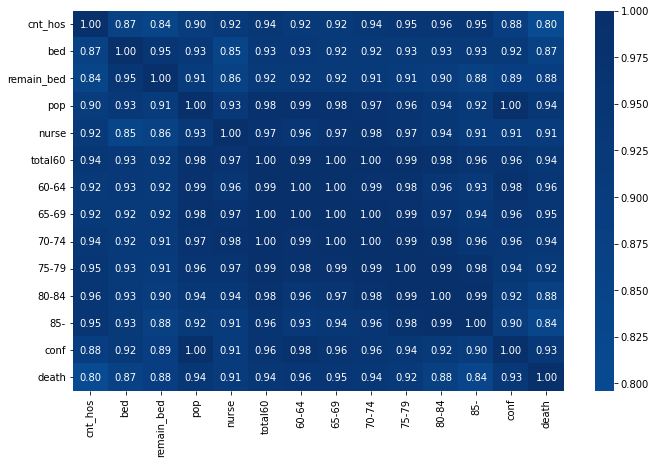

In [ ]:
# 상관계수 히트맵

import seaborn as sns
corr = sido.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr, annot=True, fmt=".2f",center=0, ax=ax, cmap=plt.cm.Blues)

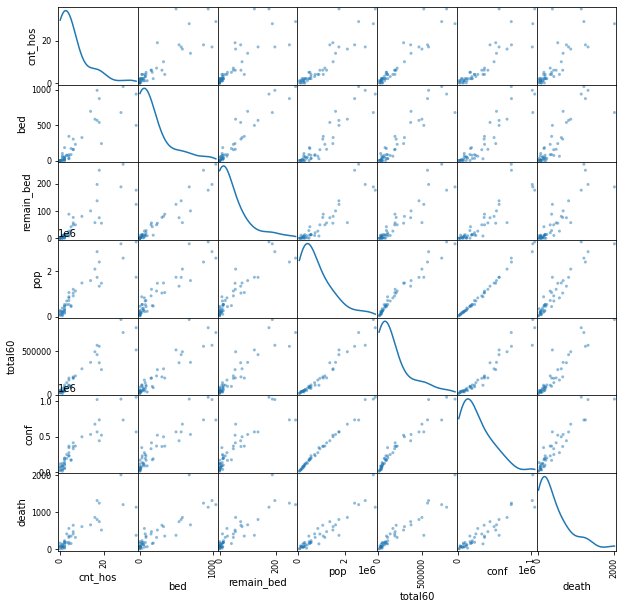

In [ ]:
# 산점도 행렬 
# 중요 변수만 고르기 - cnt_hos, bed, remain_bed, pop, total60, conf
from pandas.plotting import scatter_matrix, parallel_coordinates
axes = scatter_matrix(sido[['cnt_hos','bed','remain_bed','pop','total60','conf','death']], alpha = 0.5, figsize = (10,10), diagonal='kde')

In [ ]:
# 핑크색 워닝 메시지 없애기 ㅎ

import warnings
warnings.filterwarnings(action='ignore')

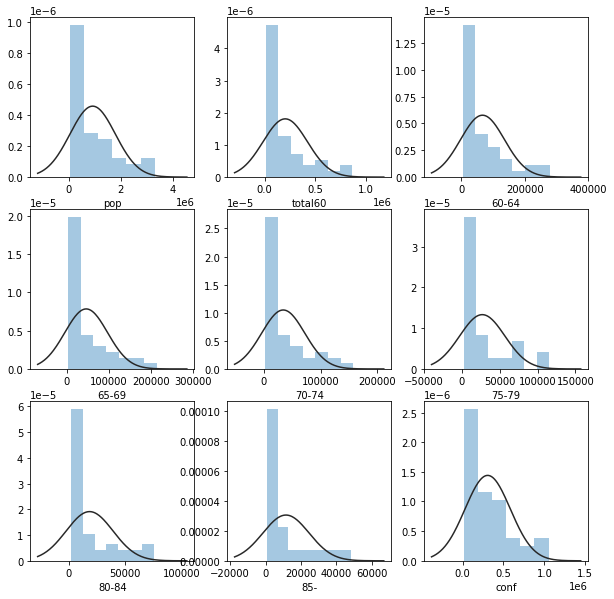

In [ ]:
# 인구수 변수의 분포 확인 - 스케일링 전

import scipy as sp
import scipy.stats

c1_name = [['pop','total60','60-64'],['65-69','70-74','75-79'],['80-84','85-','conf']]
fig, ax = plt.subplots(nrows = 3,ncols = 3)

for i in range(3): #행
    for j in range(3): #열
        sns.distplot(sido[c1_name[i][j]], kde=False, rug=False, fit =sp.stats.norm, ax = ax[i][j])

fig.set_size_inches(10,10)
plt.show()

### 1-3. 스케일링 - Normalization ( MinMaxScaler 사용 )

인구 수 변수 (pop, total60, 60-64, 65-69, 70-74, 75-79, 80-84, 85-, conf,)에 대해서 Normalization을 진행해보실래요?  
데이터를 0~1 사이로 축소시키는데 원래 데이터의 분포는 손실되지 않는다는 특징이 있습니다.   
그렇게 해서 이상치랑 정규화를 한꺼번에 처리하는게 좋을 것 같네요  

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 인구수 변수에 대해 스케일링 시행
pop_col = ['pop','total60','60-64','65-69','70-74','75-79','80-84','85-','conf']
scaler = MinMaxScaler()
scaled_pop = pd.DataFrame(scaler.fit_transform(sido[pop_col]), columns = pop_col)
scaled_pop.head()

,pop,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,0.401116,0.415937,0.410126,0.370937,0.350434,0.452401,0.495291,0.483514,0.411347
1,1.000000,0.889608,0.908195,0.835745,0.811909,0.866194,0.929659,0.903144,1.000000
2,0.780929,0.824604,0.761721,0.754898,0.755540,0.872559,1.000000,1.000000,0.691512
3,0.441132,0.322984,0.337601,0.294830,0.319911,0.323421,0.300065,0.275248,0.486429
4,0.727925,0.638194,0.651248,0.617170,0.602761,0.631010,0.620474,0.553446,0.693740


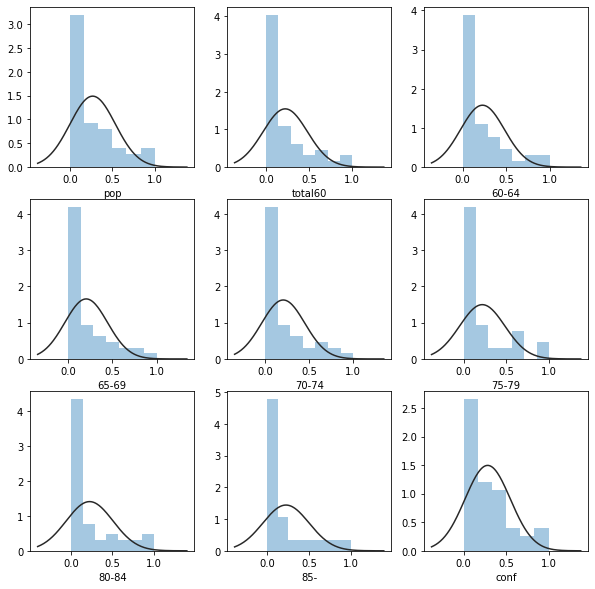

In [ ]:
# 인구수 변수의 분포 확인 - 스케일링 후

c1_name = [['pop','total60','60-64'],['65-69','70-74','75-79'],['80-84','85-','conf']]
fig, ax = plt.subplots(nrows = 3,ncols = 3)

for i in range(3): #행
    for j in range(3): #열
        sns.distplot(scaled_pop[c1_name[i][j]], kde=False, rug=False, fit =sp.stats.norm, ax = ax[i][j])

fig.set_size_inches(10,10)
plt.show()

## 스케일링 전과 비교하여, 데이터 값의 범위는 [0,1]로 축소됐지만 분포는 동일한 것을 확인할 수 있다.

In [ ]:
# 스케일링 된 인구 수 데이터프레임과 (인구수 변수 제외된)원래 데이터프레임 합치기 => 스케일링까지 전처리 완료된 데이터프레임 완성 😆❤️

sc_sido = pd.concat([sido.drop(columns = pop_col), scaled_pop], axis=1)
sc_sido

,loc,cnt_hos,bed,remain_bed,nurse,death,pop,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,강원도,18.0,539.0,75.0,34.0,746,0.401116,0.415937,0.410126,0.370937,0.350434,0.452401,0.495291,0.483514,0.411347
1,경상남도,35.0,940.0,176.0,129.0,1134,1.000000,0.889608,0.908195,0.835745,0.811909,0.866194,0.929659,0.903144,1.000000
2,경상북도,29.0,1046.0,271.0,111.0,1203,0.780929,0.824604,0.761721,0.754898,0.755540,0.872559,1.000000,1.000000,0.691512
3,광주광역시,19.0,240.0,55.0,60.0,520,0.441132,0.322984,0.337601,0.294830,0.319911,0.323421,0.300065,0.275248,0.486429
4,대구광역시,18.0,876.0,249.0,75.0,1243,0.727925,0.638194,0.651248,0.617170,0.602761,0.631010,0.620474,0.553446,0.693740
5,대전광역시,10.0,325.0,80.0,47.0,612,0.444470,0.334005,0.360270,0.317666,0.306766,0.315181,0.304707,0.296317,0.464721
6,부산광역시,28.0,679.0,188.0,169.0,2002,0.974287,1.000000,1.000000,1.000000,1.000000,1.000000,0.903045,0.737270,0.974949
7,세종특별자치시,2.0,32.0,9.0,5.0,34,0.095786,0.039962,0.047100,0.039991,0.033615,0.031034,0.030156,0.039230,0.116336
8,울산광역시,7.0,229.0,49.0,40.0,322,0.335974,0.238235,0.294747,0.246276,0.206651,0.181277,0.157890,0.139947,0.339450
9,인천광역시,17.0,993.0,197.0,68.0,1312,0.867514,0.652230,0.744107,0.605815,0.586305,0.580144,0.565577,0.579670,0.967963


### 1-4. 데이터셋 분리

In [ ]:
x = sc_sido.drop(columns=['loc','death'])
y = sc_sido['death']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1) # test
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.3, random_state=1) # train, valid

In [ ]:
# 이미 본 데이터셋의 인구수가 모두 스케일링 되어잇는거니까
# train, valid, test 세트에 대해서는 딱히 스케일링 할 필요 없음 (이미 되어있는거임)
# 마지막에 predict 데이터 세트의 인구수에 대해서만 >> transform << 만 해주면 됨!! (fit_transform 노노노)

## 2. 모델 fit, 성능 확인 

### 2-1. 모델 적용

In [ ]:
rf = RandomForestRegressor(n_estimators=500, random_state=1) # n_estimators=500
rf.fit(train_x, train_y)

RandomForestRegressor(n_estimators=500, random_state=1)

### 2-2. 변수 중요도 확인 

In [ ]:
# variable (feature) importance plot

importances = rf.feature_importances_
# rf.estimators_ : random forest로 구한 나무 모델 500개. 
df = pd.DataFrame({'Feature':train_x.columns, 'importance':importances})
df = df.sort_values('importance')
print(df)

       Feature  importance
10       80-84    0.029412
3        nurse    0.038095
11         85-    0.040088
0      cnt_hos    0.040409
9        75-79    0.044697
2   remain_bed    0.060293
1          bed    0.072354
8        70-74    0.082369
5      total60    0.089040
12        conf    0.105516
4          pop    0.119284
7        65-69    0.123083
6        60-64    0.155360


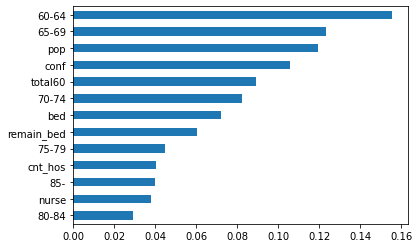

In [ ]:
ax = df.plot(kind='barh',x='Feature',y='importance', legend=False)
# barh : 가로막대플롯
ax.set_ylabel('')
plt.show()

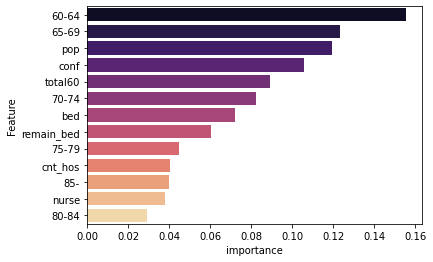

In [ ]:
df_graph = df.sort_values('importance', ascending=False)
sns.barplot(data = df_graph, x ='importance',y='Feature', palette='magma')

### 2-3. 성능 확인

In [ ]:
# train set
regressionSummary(train_y, rf.predict(train_x))


Regression statistics

                      Mean Error (ME) : 9.9673
       Root Mean Squared Error (RMSE) : 90.3142
            Mean Absolute Error (MAE) : 52.9262
          Mean Percentage Error (MPE) : -6.5270
Mean Absolute Percentage Error (MAPE) : 15.4020


In [ ]:
# valid set
regressionSummary(valid_y, rf.predict(valid_x))


Regression statistics

                      Mean Error (ME) : -39.8676
       Root Mean Squared Error (RMSE) : 201.7142
            Mean Absolute Error (MAE) : 130.7400
          Mean Percentage Error (MPE) : -52.9522
Mean Absolute Percentage Error (MAPE) : 69.4779


In [ ]:
# test set
regressionSummary(test_y, rf.predict(test_x))


Regression statistics

                      Mean Error (ME) : -30.7589
       Root Mean Squared Error (RMSE) : 77.5626
            Mean Absolute Error (MAE) : 52.9851
          Mean Percentage Error (MPE) : -24.2919
Mean Absolute Percentage Error (MAPE) : 38.0799


### 2-4. 예측 오차 시각화

In [ ]:
# boxplot
pred_error_train = pd.DataFrame({ 'residual' : train_y - rf.predict(train_x),
                                  'data set' : 'training'})
pred_error_valid = pd.DataFrame({ 'residual' : valid_y - rf.predict(valid_x),
                                  'data set' : 'validation'})
pred_error_test = pd.DataFrame({ 'residual' : test_y - rf.predict(test_x),
                                  'data set' : 'test'})
boxdata_df = pred_error_train.append(pred_error_valid, ignore_index = True)
boxdata_df = boxdata_df.append(pred_error_test, ignore_index = True)
boxdata_df.tail()

,residual,data set
40,5.414,test
41,-176.004,test
42,-2.614,test
43,22.762,test
44,-13.666,test


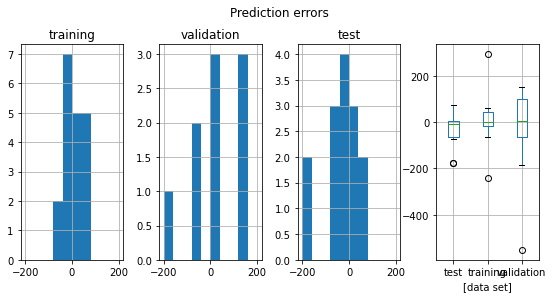

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(9,4)
common = {'bins':10, 'range':[-200, 200]} #
pred_error_train.hist(ax=axes[0], **common)
pred_error_valid.hist(ax=axes[1], **common)
pred_error_test.hist(ax=axes[2], **common)
boxdata_df.boxplot(ax=axes[3], by='data set')

axes[0].set_title('training')
axes[1].set_title('validation')
axes[2].set_title('test')
axes[3].set_title('')

plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

## validation 성능이 개구렷던건 이상치때매 그랫군... 분포도 제일 큼

### 2-5. 파라미터 조정

In [ ]:
# 가장 중요한 max_features, n_estimators만 조정했습니다.

Storng law of large numbers를 만족 시키기 위해 2000개 이상의 tree 필요  
노드 분할 시 무작위로 선택되는 변수의 수 > Regression = 변수의 수 / 3  
참고 https://youtu.be/lIT5-piVtRw   

In [ ]:
# < grid search >
param_grid = {
    'n_estimators' : [1300, 1500, 1700, 2000],
    'max_features' : [2,3,4,5,6,7,8,9,10]
}
gridSearch = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_x, train_y)
print('Improved parameters : ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_
regressionSummary(train_y, regTree.predict(train_x))
regressionSummary(valid_y, regTree.predict(valid_x))

Improved parameters :  {'max_features': 7, 'n_estimators': 1700}

Regression statistics

                      Mean Error (ME) : 10.4158
       Root Mean Squared Error (RMSE) : 93.0984
            Mean Absolute Error (MAE) : 52.5763
          Mean Percentage Error (MPE) : -5.7656
Mean Absolute Percentage Error (MAPE) : 14.9344

Regression statistics

                      Mean Error (ME) : -36.4523
       Root Mean Squared Error (RMSE) : 201.2300
            Mean Absolute Error (MAE) : 131.3817
          Mean Percentage Error (MPE) : -51.6688
Mean Absolute Percentage Error (MAPE) : 69.1464


       Feature  importance
11         85-    0.027611
10       80-84    0.032885
9        75-79    0.040951
0      cnt_hos    0.041404
3        nurse    0.055013
1          bed    0.061298
8        70-74    0.072248
2   remain_bed    0.073375
5      total60    0.092337
4          pop    0.112466
12        conf    0.120642
7        65-69    0.121099
6        60-64    0.148671


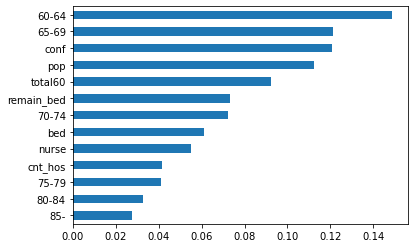

In [ ]:
importances = regTree.feature_importances_
df = pd.DataFrame({'Feature':train_x.columns, 'importance':importances})
df = df.sort_values('importance')
print(df)
ax = df.plot(kind='barh',x='Feature',y='importance', legend=False)
# barh : 가로막대플롯
ax.set_ylabel('')
plt.show()

In [ ]:
# n_estimators를 작게 조정하여 다시 grid search를 시행
# < grid search >
param_grid = {
    'n_estimators' : [500, 700, 1000,1300],
    'max_features' : [2,3,4,5,6,7,8,9,10]
}
gridSearch = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_x, train_y)
print('Improved parameters : ', gridSearch.best_params_)
regTree_grid = gridSearch.best_estimator_
regressionSummary(train_y, regTree_grid.predict(train_x))
regressionSummary(valid_y, regTree_grid.predict(valid_x))

Improved parameters :  {'max_features': 5, 'n_estimators': 500}

Regression statistics

                      Mean Error (ME) : 13.6716
       Root Mean Squared Error (RMSE) : 87.9978
            Mean Absolute Error (MAE) : 52.3398
          Mean Percentage Error (MPE) : -4.9941
Mean Absolute Percentage Error (MAPE) : 14.5363

Regression statistics

                      Mean Error (ME) : -32.6858
       Root Mean Squared Error (RMSE) : 207.9027
            Mean Absolute Error (MAE) : 137.2410
          Mean Percentage Error (MPE) : -50.7946
Mean Absolute Percentage Error (MAPE) : 69.6629


       Feature  importance
11         85-    0.029120
10       80-84    0.029829
0      cnt_hos    0.031872
9        75-79    0.038613
3        nurse    0.051610
1          bed    0.057416
2   remain_bed    0.059152
8        70-74    0.092167
5      total60    0.109086
12        conf    0.111204
4          pop    0.113327
7        65-69    0.127559
6        60-64    0.149046


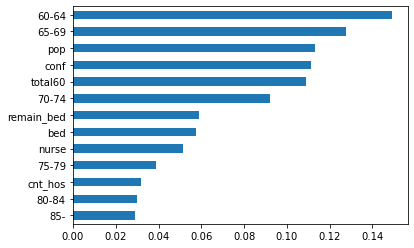

In [ ]:
importances = regTree_grid.feature_importances_
df = pd.DataFrame({'Feature':train_x.columns, 'importance':importances})
df = df.sort_values('importance')
print(df)
ax = df.plot(kind='barh',x='Feature',y='importance', legend=False)
# barh : 가로막대플롯
ax.set_ylabel('')
plt.show()

In [ ]:
# 미세한 차이지만 'max_features': 7, 'n_estimators': 1700 모델이 가장 좋아서 이를 채택함 (regTree)

### 2-6. test 세트에 대한 최종 예측 성능

In [ ]:
regressionSummary(test_y, regTree.predict(test_x))


Regression statistics

                      Mean Error (ME) : -32.3487
       Root Mean Squared Error (RMSE) : 80.0690
            Mean Absolute Error (MAE) : 54.4971
          Mean Percentage Error (MPE) : -23.3662
Mean Absolute Percentage Error (MAPE) : 37.8843


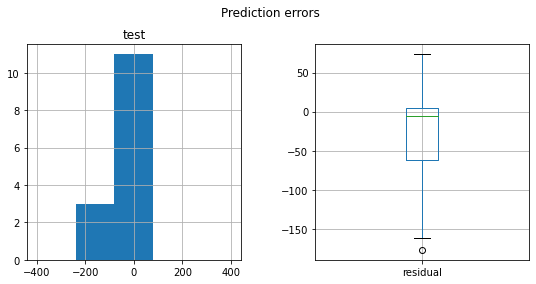

In [ ]:
pred_error_test = pd.DataFrame({ 'residual' : test_y - regTree_grid.predict(test_x),
                                  'data set' : 'test'})

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(9,4)
common = {'bins':5, 'range':[-400, 400]} #
pred_error_test.hist(ax=axes[0], **common)
pred_error_test.boxplot(ax=axes[1])

axes[0].set_title('test')
axes[1].set_title('')

plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

## [-100,100]사이의 오차를 가짐. 이상치가 하나 존재한다.

In [ ]:
test_death=[]
for i in range(0,45):
    test_death.append(regTree_grid.predict(x.loc[[i]]))
sido_death = sido
sido_death['pred_death'] = pd.DataFrame(test_death)
sido_death[['death','pred_death']]

,death,pred_death
0,746,598.026
1,1134,1696.620
2,1203,1364.956
3,520,602.420
4,1243,1182.076
5,612,570.510
6,2002,1708.434
7,34,104.496
8,322,486.576
9,1312,1260.504


## 3. 실제 데이터에 predict

### 3-1. 데이터 전처리

In [ ]:
pred_sido = pd.read_csv("./final_dataset/시도명_시군구명(predict).csv").drop(columns=['Unnamed: 0'])
pred_sido.head()

,시도명,시군구명,병원수,격리병상수,남은 격리병상수,총인구,요양기관수,60세 이상 - 계,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,확진자수
0,강원도,강릉시,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0
1,강원도,동해시,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0
2,강원도,삼척시,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0
3,강원도,속초시,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0
4,강원도,영월군,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0


In [ ]:
columns = ['loc_sido','loc_gun','cnt_hos','bed','remain_bed','pop','nurse','total60','60-64','65-69','70-74','75-79','80-84','85-','conf']
pred_sido.columns = columns
pred_sido

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,강원도,강릉시,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0
1,강원도,동해시,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0
2,강원도,삼척시,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0
3,강원도,속초시,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0
4,강원도,영월군,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0
5,강원도,원주시,3.0,131.0,23.0,352429.0,8.0,76620,26789,16898,10822,10081,7434,4596,121739.0
6,강원도,인제군,0.0,0.0,0.0,30147.0,1.0,9039,2900,1960,1246,1338,964,631,11613.0
7,강원도,철원군,1.0,1.0,0.0,43042.0,1.0,13060,3674,2634,2243,2265,1473,771,15572.0
8,강원도,춘천시,2.0,64.0,13.0,284645.0,8.0,68563,21478,14964,10196,10015,7299,4611,102821.0
9,강원도,평창군,1.0,0.0,0.0,39258.0,2.0,15742,4797,3493,2470,2278,1748,956,9659.0


In [ ]:
### 남은 병상수에 음수 값을 0으로 변환

pred_sido[pred_sido['remain_bed'] < 0]

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
46,경상남도,남해군,1.0,0.0,-1.0,41587.0,1.0,19264,4227,3698,3378,3078,2731,2152,9062.0
134,서울특별시,중랑구,3.0,208.0,-81.0,385663.0,2.0,97168,32215,23269,17323,12806,7423,4132,130693.0


In [ ]:
#❓❗️❓❗️-1.0까지는 0으로 바꾸겠는데 -81 머.머임...????? +81.0 오타아니야..? 일단 0으로 바꾸고 진행하겠습니다...❓❗️❓❗️

In [ ]:
pred_sido.loc[46,'remain_bed'] = 0
pred_sido.loc[134,'remain_bed'] = 0

In [ ]:
pred_sido[pred_sido['remain_bed'] < 0] # 음수 없음 확인 

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf


### 3-2. 인구수 변수 스케일링 (transform)

In [ ]:
pop_col = ['pop','total60','60-64','65-69','70-74','75-79','80-84','85-','conf']
test_scaled_pop = pd.DataFrame(scaler.transform(pred_sido[pop_col]), columns = pop_col)
test_scaled_pop.head()

,pop,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,0.053559,0.054730,0.053250,0.050233,0.047934,0.059311,0.060651,0.062993,0.050155
1,0.013991,0.011922,0.013174,0.012712,0.009854,0.012908,0.007627,0.007320,0.014066
2,0.007272,0.008082,0.007298,0.007366,0.006653,0.009627,0.008971,0.012136,0.003662
3,0.011610,0.008917,0.011632,0.009547,0.006427,0.007352,0.004696,0.005113,0.013079
4,-0.001843,0.000208,0.000729,0.001556,-0.001620,0.000489,-0.000611,-0.002334,-0.004330


In [ ]:
sc_pred_sido = pd.concat([pred_sido.drop(columns = pop_col), test_scaled_pop], axis=1)
sc_pred_sido.head()

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,nurse,pop,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,강원도,강릉시,3.0,79.0,24.0,3.0,0.053559,0.054730,0.053250,0.050233,0.047934,0.059311,0.060651,0.062993,0.050155
1,강원도,동해시,2.0,66.0,1.0,3.0,0.013991,0.011922,0.013174,0.012712,0.009854,0.012908,0.007627,0.007320,0.014066
2,강원도,삼척시,1.0,51.0,8.0,1.0,0.007272,0.008082,0.007298,0.007366,0.006653,0.009627,0.008971,0.012136,0.003662
3,강원도,속초시,2.0,119.0,5.0,2.0,0.011610,0.008917,0.011632,0.009547,0.006427,0.007352,0.004696,0.005113,0.013079
4,강원도,영월군,1.0,27.0,1.0,1.0,-0.001843,0.000208,0.000729,0.001556,-0.001620,0.000489,-0.000611,-0.002334,-0.004330


### 3-3. Predict

In [ ]:
predictors = sc_pred_sido.drop(columns=['loc_sido','loc_gun'])
predictors.head()

,cnt_hos,bed,remain_bed,nurse,pop,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,3.0,79.0,24.0,3.0,0.053559,0.054730,0.053250,0.050233,0.047934,0.059311,0.060651,0.062993,0.050155
1,2.0,66.0,1.0,3.0,0.013991,0.011922,0.013174,0.012712,0.009854,0.012908,0.007627,0.007320,0.014066
2,1.0,51.0,8.0,1.0,0.007272,0.008082,0.007298,0.007366,0.006653,0.009627,0.008971,0.012136,0.003662
3,2.0,119.0,5.0,2.0,0.011610,0.008917,0.011632,0.009547,0.006427,0.007352,0.004696,0.005113,0.013079
4,1.0,27.0,1.0,1.0,-0.001843,0.000208,0.000729,0.001556,-0.001620,0.000489,-0.000611,-0.002334,-0.004330


In [ ]:
pred_death=[]
for i in range(0,206):
    pred_death.append(regTree_grid.predict(predictors.loc[[i]]))

In [ ]:
pred_sido_death = pred_sido
pred_sido_death['pred_death'] = pd.DataFrame(pred_death)
pred_sido_death

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,pred_death
0,강원도,강릉시,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0,146.844
1,강원도,동해시,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0,67.000
2,강원도,삼척시,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0,64.850
3,강원도,속초시,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0,68.042
4,강원도,영월군,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0,64.444
5,강원도,원주시,3.0,131.0,23.0,352429.0,8.0,76620,26789,16898,10822,10081,7434,4596,121739.0,174.586
6,강원도,인제군,0.0,0.0,0.0,30147.0,1.0,9039,2900,1960,1246,1338,964,631,11613.0,62.670
7,강원도,철원군,1.0,1.0,0.0,43042.0,1.0,13060,3674,2634,2243,2265,1473,771,15572.0,62.468
8,강원도,춘천시,2.0,64.0,13.0,284645.0,8.0,68563,21478,14964,10196,10015,7299,4611,102821.0,168.706
9,강원도,평창군,1.0,0.0,0.0,39258.0,2.0,15742,4797,3493,2470,2278,1748,956,9659.0,62.468


In [ ]:
pred_sido_death.to_csv("./final_dataset/랜덤포레스트_예측결과_최종_피드백반영_이상치제거.csv")

### +) 추가💜
**세분이서 각각 진행한 모델 별로 시군구별로 예측된 사망자수를 도 단위로 합쳐서 원래 데이터의 사망자 수랑 한번 비교해보세요.**

In [ ]:
pred_sum = pred_sido_death.groupby('loc_sido', as_index=False).sum()
pred_sum

,loc_sido,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,pred_death
0,강원도,18.0,539.0,75.0,1347375.0,34.0,369970,116558,81374,56864,53119,38211,23844,440985.0,1067.014
1,경기도,70.0,1966.0,467.0,13453658.0,318.0,2517321,878926,572377,412064,314849,207567,131538,4800166.0,6085.740
2,경상남도,35.0,940.0,177.0,3295942.0,129.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,1925.576
3,경상북도,29.0,1046.0,271.0,2583157.0,111.0,719154,213011,162533,119640,100383,75400,48187,731978.0,2025.376
4,광주광역시,19.0,240.0,55.0,1477573.0,60.0,290547,96662,65287,52134,38610,23826,14028,518968.0,789.158
5,대구광역시,18.0,876.0,249.0,2410700.0,75.0,559877,182705,133421,95965,73211,47435,27140,734292.0,1431.588
6,대전광역시,10.0,325.0,80.0,1488435.0,47.0,299964,102881,70114,50097,37683,24168,15021,496421.0,717.350
7,부산광역시,28.0,679.0,188.0,3212282.0,169.0,869020,278378,214341,157522,114719,68256,35804,1026370.0,2117.500
8,서울특별시,47.0,2150.0,442.0,9231569.0,125.0,2045748,654912,485063,369940,272798,163781,99254,3391551.0,4957.166
9,세종특별자치시,2.0,32.0,9.0,353933.0,5.0,48720,16969,11421,7769,5719,3938,2904,134571.0,104.496


In [ ]:
real_death = sido[['loc','death']].iloc[0:16]
real_death

,loc,death
0,강원도,746
1,경상남도,1134
2,경상북도,1203
3,광주광역시,520
4,대구광역시,1243
5,대전광역시,612
6,부산광역시,2002
7,세종특별자치시,34
8,울산광역시,322
9,인천광역시,1312


In [ ]:
pred_death = pred_sum[['loc_sido','pred_death']].rename(columns = {'loc_sido':'loc'})
pred_death

,loc,pred_death
0,강원도,1067.014
1,경기도,6085.740
2,경상남도,1925.576
3,경상북도,2025.376
4,광주광역시,789.158
5,대구광역시,1431.588
6,대전광역시,717.350
7,부산광역시,2117.500
8,서울특별시,4957.166
9,세종특별자치시,104.496


In [ ]:
# 비교 데이터 프레임 만들기

compare_death = pd.merge(real_death, pred_death)
compare_death

,loc,death,pred_death
0,강원도,746,1067.014
1,경상남도,1134,1925.576
2,경상북도,1203,2025.376
3,광주광역시,520,789.158
4,대구광역시,1243,1431.588
5,대전광역시,612,717.350
6,부산광역시,2002,2117.500
7,세종특별자치시,34,104.496
8,울산광역시,322,480.514
9,인천광역시,1312,1484.286
